In [27]:
import pandas as pd

In [28]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [29]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [30]:
df.drop('id', axis='columns', inplace=True)

In [31]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [32]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [33]:
import numpy as np
bmi_mean = np.mean(df.bmi)
bmi_mean

28.893236911794673

In [34]:
df.fillna(bmi_mean, inplace=True)
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [35]:
df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [36]:
df.gender.unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [37]:
df.ever_married.unique()

array(['Yes', 'No'], dtype=object)

In [38]:
df.work_type.unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [39]:
df.Residence_type.unique()

array(['Urban', 'Rural'], dtype=object)

In [40]:
df.smoking_status.unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [41]:
from sklearn.preprocessing import LabelEncoder
df1=df.apply(LabelEncoder().fit_transform)

In [42]:
df1.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,88,0,1,1,2,1,3850,240,1,1
1,0,82,0,0,1,3,0,3588,162,2,1
2,1,101,0,1,1,2,0,2483,199,2,1
3,0,70,0,0,1,2,1,3385,218,3,1
4,0,100,1,0,1,3,0,3394,113,2,1


In [43]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
items = ['age','avg_glucose_level','bmi']
df1[items] = scaler.fit_transform(df[items])

In [44]:
df1.sample(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1296,1,0.536133,0,0,1,2,0,0.294940,0.219931,2,0
2465,0,0.316406,0,0,0,2,1,0.157696,0.130584,3,0
1881,1,0.755859,0,0,1,3,1,0.348260,0.295533,0,0
2756,0,0.499512,0,0,0,2,1,0.142692,0.184422,2,0
4099,1,0.975586,0,0,0,2,1,0.020174,0.175258,0,0


In [45]:
corr = df.corr()
corr['stroke'].sort_values(ascending=False)

stroke               1.000000
age                  0.245257
heart_disease        0.134914
avg_glucose_level    0.131945
hypertension         0.127904
bmi                  0.038947
Name: stroke, dtype: float64

In [46]:
df1.stroke.unique()

array([1, 0], dtype=int64)

In [47]:
X = df1.drop('stroke', axis='columns')
y = df1.stroke

In [66]:
y[y==0].count(), y[y==1].count() #Imbalanced data here

(4861, 249)

In [70]:
#fixing the imbalance with SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy="minority")
X_sm,y_sm = smote.fit_resample(X,y)

In [71]:
y_sm[y_sm==0].count(), y_sm[y_sm==1].count()

(4861, 4861)

In [72]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_sm,y_sm,test_size=0.2, random_state=100)

In [73]:
X_train.shape

(7777, 10)

In [74]:
import tensorflow as tf
from tensorflow import keras

In [75]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(10,), activation='relu'),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dropout(rate=0.4),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dropout(rate=0.4),
    keras.layers.Dense(1, activation='sigmoid'),
])

tb_callback=tf.keras.callbacks.TensorBoard(log_dir="logs/", histogram_freq=1)

model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])
model.fit(X_train,y_train, epochs=100, callbacks=[tb_callback])

Epoch 1/100
244/244 [==============================] - 1s 2ms/step - loss: 0.6039 - accuracy: 0.6632
Epoch 2/100
244/244 [==============================] - 1s 2ms/step - loss: 0.4905 - accuracy: 0.7705
Epoch 3/100
244/244 [==============================] - 0s 2ms/step - loss: 0.4609 - accuracy: 0.7876
Epoch 4/100
244/244 [==============================] - 0s 2ms/step - loss: 0.4501 - accuracy: 0.7918
Epoch 5/100
244/244 [==============================] - 1s 2ms/step - loss: 0.4401 - accuracy: 0.7967
Epoch 6/100
244/244 [==============================] - 1s 2ms/step - loss: 0.4370 - accuracy: 0.8002
Epoch 7/100
244/244 [==============================] - 1s 2ms/step - loss: 0.4287 - accuracy: 0.8070
Epoch 8/100
244/244 [==============================] - 0s 2ms/step - loss: 0.4267 - accuracy: 0.8020
Epoch 9/100
244/244 [==============================] - 1s 2ms/step - loss: 0.4258 - accuracy: 0.8033
Epoch 10/100
244/244 [==============================] - 0s 2ms/step - loss: 0.4219 - accura

244/244 [==============================] - 1s 2ms/step - loss: 0.3311 - accuracy: 0.8521
Epoch 82/100
244/244 [==============================] - 1s 2ms/step - loss: 0.3294 - accuracy: 0.8556
Epoch 83/100
244/244 [==============================] - 1s 2ms/step - loss: 0.3351 - accuracy: 0.8534
Epoch 84/100
244/244 [==============================] - 0s 2ms/step - loss: 0.3329 - accuracy: 0.8564
Epoch 85/100
244/244 [==============================] - 1s 2ms/step - loss: 0.3318 - accuracy: 0.8568
Epoch 86/100
244/244 [==============================] - 0s 2ms/step - loss: 0.3367 - accuracy: 0.8538
Epoch 87/100
244/244 [==============================] - 1s 2ms/step - loss: 0.3349 - accuracy: 0.8499
Epoch 88/100
244/244 [==============================] - 0s 2ms/step - loss: 0.3317 - accuracy: 0.8528
Epoch 89/100
244/244 [==============================] - 1s 2ms/step - loss: 0.3307 - accuracy: 0.8552
Epoch 90/100
244/244 [==============================] - 0s 2ms/step - loss: 0.3278 - accuracy: 

In [76]:
model.evaluate(X_test,y_test)

61/61 [==============================] - 0s 1ms/step - loss: 0.3530 - accuracy: 0.8432


[0.35302266478538513, 0.843187689781189]

In [77]:
y_pred = model.predict(X_test)
y_pred[:5]

array([[1.1879325e-04],
       [7.1330512e-01],
       [7.8830636e-01],
       [9.2207384e-01],
       [8.9750642e-01]], dtype=float32)

In [78]:
y_predicted = []
for i in y_pred:
    if i>0.5:
        y_predicted.append(1)
    else:
        y_predicted.append(0)

In [79]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.91      0.77      0.83       977
           1       0.80      0.92      0.85       968

    accuracy                           0.84      1945
   macro avg       0.85      0.84      0.84      1945
weighted avg       0.85      0.84      0.84      1945



In [80]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted)

In [81]:
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

Text(69.0, 0.5, 'Truth')

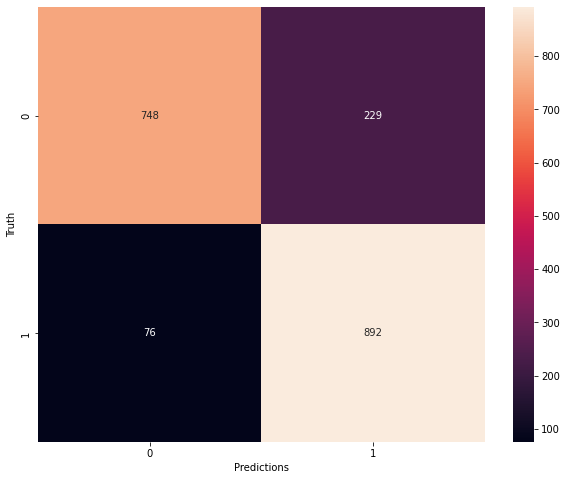

In [82]:
plt.figure(figsize=(10,8))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predictions")
plt.ylabel("Truth")